# **E - COMMERCE SALES ANALYSIS**

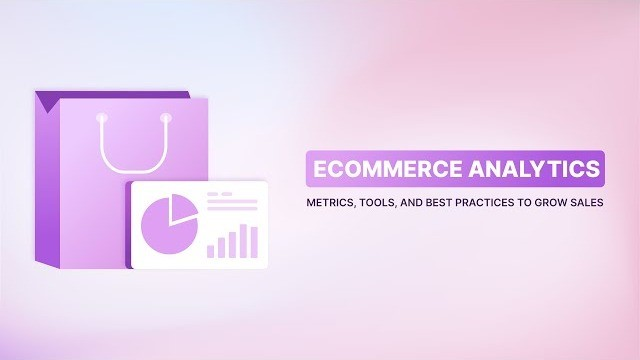

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### ***Importing dataset and preprocessing it***

In [ ]:
data = pd.read_csv('data.csv',encoding = 'unicode_escape')

In [ ]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
238346,557937,85132C,CHARLIE AND LOLA FIGURES TINS,1.0,6/23/2011 15:30,5.79,NaN,United Kingdom
238347,557937,DOT,DOTCOM POSTAGE,1.0,6/23/2011 15:30,157.81,NaN,United Kingdom
238348,557937,22303,COFFEE MUG APPLES DESIGN,6.0,6/23/2011 15:30,2.55,NaN,United Kingdom
238349,557937,22210,WOOD STAMP SET BEST WISHES,6.0,6/23/2011 15:30,0.83,NaN,United Kingdom
238350,557937,22892,SET OF SAL,NaN,NaN,NaN,NaN,NaN


### ***Display the dimensions of the dataframe***

In [ ]:
data.shape

(238351, 8)

### ***Basic information about the dataframe***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238351 entries, 0 to 238350
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    238351 non-null  object 
 1   StockCode    238351 non-null  object 
 2   Description  237453 non-null  object 
 3   Quantity     238350 non-null  float64
 4   InvoiceDate  238350 non-null  object 
 5   UnitPrice    238350 non-null  float64
 6   CustomerID   171623 non-null  float64
 7   Country      238350 non-null  object 
dtypes: float64(3), object(5)
memory usage: 14.5+ MB


In [ ]:
data.nunique()

,0
InvoiceNo,12381
StockCode,3639
Description,3609
Quantity,475
InvoiceDate,11158
UnitPrice,1047
CustomerID,2968
Country,37


### ***Generate a sample random row***

In [ ]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
80174,543022,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,1.0,2/2/2011 14:37,1.45,16771.0,United Kingdom
212722,555508,22037,ROBOT BIRTHDAY CARD,12.0,6/3/2011 16:45,0.42,16880.0,United Kingdom
46338,540352,85199S,SMALL HANGING IVORY/RED WOOD BIRD,1.0,1/6/2011 14:27,0.85,NaN,United Kingdom
186047,552843,20754,RETROSPOT RED WASHING UP GLOVES,1.0,5/11/2011 14:37,2.10,14649.0,United Kingdom
20837,538071,21876,POTTERING MUG,1.0,12/9/2010 14:09,3.36,NaN,United Kingdom


### ***Descriptive Statistics (numerical values) of the DataFrame***

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,238350.000000,238350.000000,171623.000000
mean,9.290485,5.086465,15274.514902
std,223.832382,119.452449,1724.860438
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13838.000000
50%,3.000000,2.100000,15133.000000
75%,10.000000,4.210000,16814.000000
max,74215.000000,38970.000000,18287.000000


### ***Display the data types of the Columns***

In [ ]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,float64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


### ***Convert InvoiceDate into datetime datatype***

In [ ]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,float64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


Check for missing value

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
#fill missing values in the Description column as "unknown"
data['Description']=data['Description'].fillna('unknown')

### ***Check Negative Unit Price***

In [ ]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales


In [ ]:
# drop rows with missing values in the Customer ID
data=data.dropna(subset=['CustomerID'])

### ***Change the data type of column CustomerID to int data type***

In [ ]:
#Type cast for column 'CustomerID'
data=data.astype({'CustomerID':int})

In [ ]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,float64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


### ***Find the number of duplicate rows in the dataframe***

In [ ]:
data.duplicated().sum()

1930

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(169693, 8)

# **Calculate total sales for each invoi**ce

In [ ]:
data['TotalSales']=data['Quantity']*data['UnitPrice']

In [ ]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales'],
      dtype='object')

# **Find maximum,minimum and average total sales**

In [ ]:
data['TotalSales'].max()

77183.6

In [ ]:
data['TotalSales'].min()

-77183.6

In [ ]:
data['UnitPrice'].min()

0.0

In [ ]:
data['Quantity'].min()

-74215.0

# **Remove the negative quantity purchases from the dataframe**

In [ ]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
237733,C557883,90200B,BLACK SWEETHEART BRACELET,-1.0,2011-06-23 13:30:00,4.25,17611,United Kingdom,-4.25
237734,C557883,79191C,RETRO PLASTIC ELEPHANT TRAY,-1.0,2011-06-23 13:30:00,0.85,17611,United Kingdom,-0.85
237938,C557890,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-3.0,2011-06-23 13:54:00,2.95,17204,United Kingdom,-8.85
238067,C557895,22656,VINTAGE BLUE KITCHEN CABINET,-1.0,2011-06-23 14:20:00,125.00,15834,United Kingdom,-125.00


In [ ]:
data=data[data['Quantity']>0]

In [ ]:
#check min to confrim for positive quantity
data['Quantity'].min()

1.0

In [ ]:
data.shape

(165621, 9)

In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
count,165621.000000,165621,165621.000000,165621.000000,165621.000000
mean,13.444871,2011-03-16 17:10:58.799427840,3.295916,15276.337385,23.299701
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-01-25 12:39:00,1.250000,13842.000000,5.040000
50%,6.000000,2011-03-21 13:35:00,1.950000,15139.000000,12.750000
75%,12.000000,2011-05-10 14:22:00,3.750000,16814.000000,19.800000
max,74215.000000,2011-06-23 15:26:00,8142.750000,18287.000000,77183.600000
std,188.158461,NaN,24.422666,1725.611733,225.603759


# **Display all the unique values in a column**

In [ ]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta'], dtype=object)

# **Display total no of unique values in each column. It can be applied on a single column as well as on the whole dataframe**

In [ ]:
data.Country.nunique()

36

In [ ]:
#check the unique values in all columns
data.nunique()

,0
InvoiceNo,8528
StockCode,3258
Description,3347
Quantity,208
InvoiceDate,8038
UnitPrice,284
CustomerID,2925
Country,36
TotalSales,1826


### ***Display all the unique values with their count in a column***

In [ ]:
data.Country.value_counts()

,count
Country,
United Kingdom,147124
Germany,3943
France,3528
EIRE,2607
Netherlands,1139
Spain,1131
Belgium,914
Switzerland,679
Australia,629


In [ ]:
data.Country.value_counts()[data.Country.value_counts()>1000]

,count
Country,
United Kingdom,147124
Germany,3943
France,3528
EIRE,2607
Netherlands,1139
Spain,1131


#**View the purchases made by country Japan**

In [ ]:
data.loc[data.Country=="Japan"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6.0,2010-12-05 15:46:00,2.55,12763,Japan,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12.0,2010-12-05 15:46:00,0.42,12763,Japan,5.04
9785,537218,22716,CARD CIRCUS PARADE,12.0,2010-12-05 15:46:00,0.42,12763,Japan,5.04
9786,537218,22983,CARD BILLBOARD FONT,12.0,2010-12-05 15:46:00,0.42,12763,Japan,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12.0,2010-12-05 15:46:00,0.42,12763,Japan,5.04
...,...,...,...,...,...,...,...,...,...
235991,557670,22491,PACK OF 12 COLOURED PENCILS,576.0,2011-06-22 10:11:00,0.72,12798,Japan,414.72
235992,557670,22489,PACK OF 12 TRADITIONAL CRAYONS,432.0,2011-06-22 10:11:00,0.36,12798,Japan,155.52
235993,557670,21918,SET 12 KIDS COLOUR CHALK STICKS,576.0,2011-06-22 10:11:00,0.36,12798,Japan,207.36
235994,557670,22181,SNOWSTORM PHOTO FRAME FRIDGE MAGNET,96.0,2011-06-22 10:11:00,0.72,12798,Japan,69.12


In [ ]:
# view product description, quantity and totalsales of purchases made from Japan
data.loc[data.Country=="Japan",['Description','Quantity','TotalSales']]

,Description,Quantity,TotalSales
9783,SET OF 6 VINTAGE NOTELETS KIT,6.0,15.30
9784,"FANCY FONT BIRTHDAY CARD,",12.0,5.04
9785,CARD CIRCUS PARADE,12.0,5.04
9786,CARD BILLBOARD FONT,12.0,5.04
9787,SWALLOWS GREETING CARD,12.0,5.04
...,...,...,...
235991,PACK OF 12 COLOURED PENCILS,576.0,414.72
235992,PACK OF 12 TRADITIONAL CRAYONS,432.0,155.52
235993,SET 12 KIDS COLOUR CHALK STICKS,576.0,207.36
235994,SNOWSTORM PHOTO FRAME FRIDGE MAGNET,96.0,69.12


from matplotlib import pyplot as plt
_df_0['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TotalSales'].plot(kind='hist', bins=20, title='TotalSales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Quantity', y='TotalSales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['TotalSales'].plot(kind='line', figsize=(8, 4), title='TotalSales')
plt.gca().spines[['top', 'right']].set_visible(False)

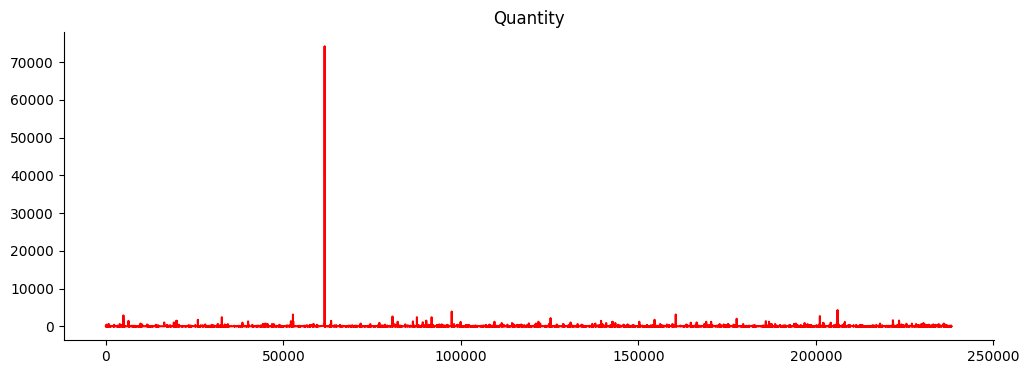

In [ ]:
import matplotlib.pyplot as plt

# View product description, quantity, and total sales of purchases made from Japan
japan_data = data.loc[data["Country"] == "Japan", ['Description', 'Quantity', 'TotalSales']]

# Plot the 'Quantity' column as a line chart
data['Quantity'].plot(kind='line', figsize=(12, 4), title='Quantity',color='red')

# Remove top and right spines for better aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

### **Select purchases of product PARTY BUNTY where Quantity > 100**

In [ ]:
data.loc[(data.Description=="PARTY BUNTIES")&(data.Quantity>100),'Description':]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales


### **Get all records of the product water bottle**

In [ ]:
data[data.Description.str.contains('WATER BOTTLE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 09:02:00,3.39,17850,United Kingdom,20.34
78,536375,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 09:32:00,3.39,17850,United Kingdom,20.34
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48.0,2010-12-01 09:32:00,3.45,15291,United Kingdom,165.60
229,536390,21485,RETROSPOT HEART HOT WATER BOTTLE,24.0,2010-12-01 10:19:00,4.25,17511,United Kingdom,102.00
...,...,...,...,...,...,...,...,...,...
236247,557745,22835,HOT WATER BOTTLE I AM SO POORLY,2.0,2011-06-22 12:16:00,4.65,15750,United Kingdom,9.30
236805,557785,22111,SCOTTIE DOG HOT WATER BOTTLE,24.0,2011-06-22 15:50:00,4.25,14364,United Kingdom,102.00
237919,557889,21479,WHITE SKULL HOT WATER BOTTLE,4.0,2011-06-23 13:51:00,3.75,12412,Denmark,15.00
237920,557889,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,3.0,2011-06-23 13:51:00,4.65,12412,Denmark,13.95


from matplotlib import pyplot as plt
_df_5['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['TotalSales'].plot(kind='hist', bins=20, title='TotalSales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='UnitPrice', y='CustomerID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='CustomerID', y='TotalSales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('InvoiceDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['UnitPrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('InvoiceDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('UnitPrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['CustomerID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('InvoiceDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('CustomerID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['TotalSales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('InvoiceDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('TotalSales')

from matplotlib import pyplot as plt
_df_16['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['TotalSales'].plot(kind='line', figsize=(8, 4), title='TotalSales')
plt.gca().spines[['top', 'right']].set_visible(False)

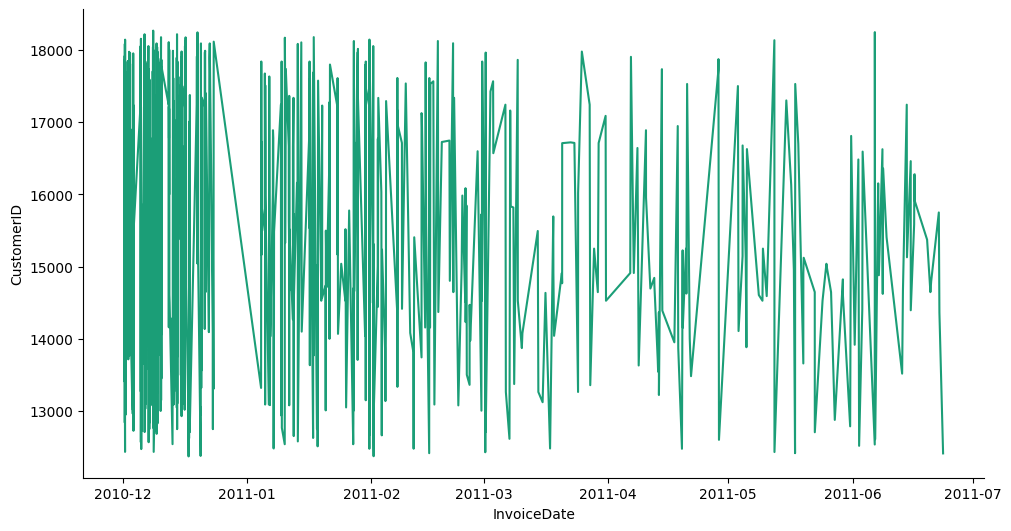

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['InvoiceDate']
    # Correcting ys to filter based on the Description containing 'WATER BOTTLE'
    ys = series[series['Description'].str.contains('WATER BOTTLE')]['CustomerID']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sorting data by InvoiceDate
df_sorted = _df_14.sort_values('InvoiceDate', ascending=True)

# Plot the series with the correct label
_plot_series(df_sorted, 'Water Bottle Purchases')

sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('CustomerID')

# **Split the Data into Groups**

### ***Find the country with highest number of unique customers***

In [ ]:
data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

,CustomerID
Country,
United Kingdom,2648
France,60
Germany,59
Belgium,22
Spain,20
Switzerland,12
Portugal,12
Australia,8
Netherlands,8


### ***Find the sum of total sales by Country***

In [ ]:
#Group data by country and calculate total sales for each country
sales_c=data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
sales_c.head(10)

,TotalSales
Country,
United Kingdom,3140502.251
Netherlands,125816.110
Germany,105927.900
EIRE,100385.710
France,88702.140
Australia,79739.290
Spain,27688.730
Japan,23041.770
Switzerland,22568.010


# **Visualize the sales by country**

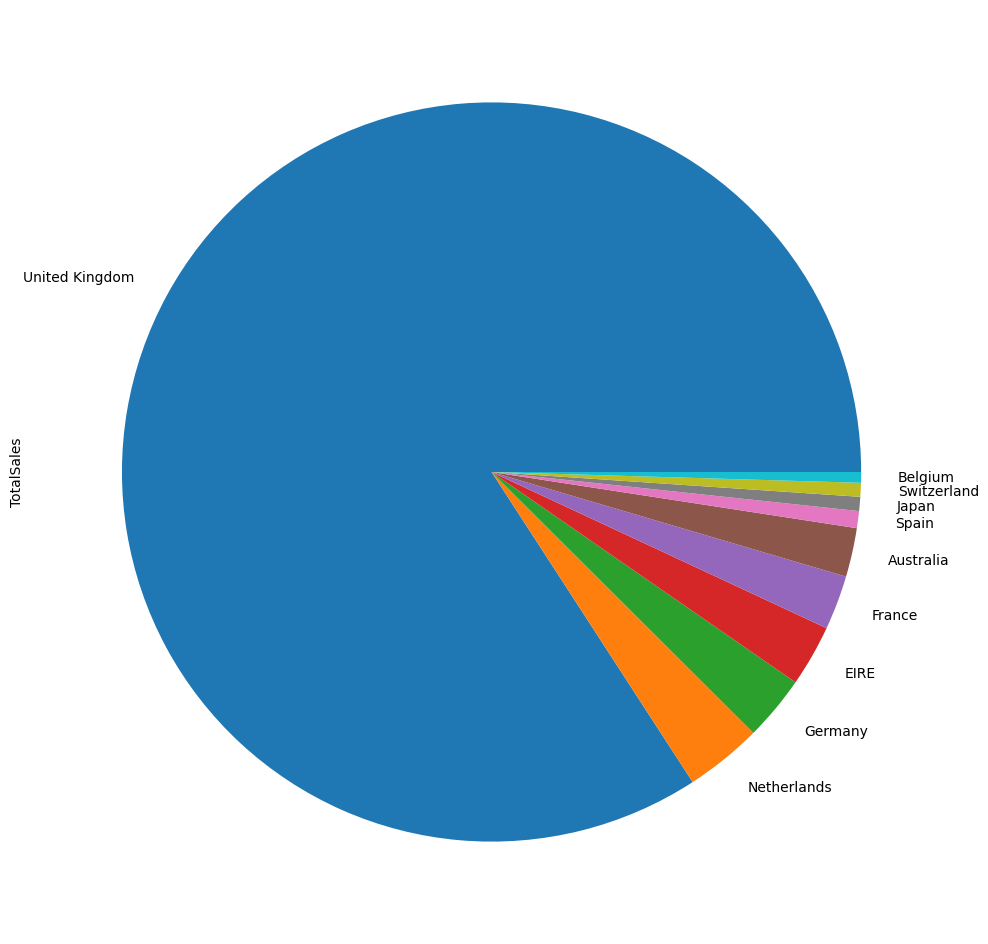

In [ ]:
top_sales=sales_c[:10]
top_sales.plot.pie(figsize=(12,12))
plt.show()

# **Average sales by Country**

In [ ]:
avg_sales=data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
avg_sales.tail(10)

,TotalSales
Country,
Unspecified,1337.56
Brazil,1143.60
United Arab Emirates,889.24
Malta,863.16
Israel,779.10
European Community,623.45
Czech Republic,549.26
Bahrain,548.40
USA,383.95


# **Average sales in UK**

In [ ]:
a_uk=data.Country=='United Kingdom'
data.loc[a_uk,'TotalSales'].mean()

21.345954779641662

### ***Find the total amount spent by each customer***

In [ ]:
cust=data.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
cust

,TotalSales
CustomerID,
14646,121973.65
18102,106601.55
12346,77183.60
12415,74310.71
17450,61165.74
...,...
17956,12.75
15863,9.20
14285,5.90


In [ ]:
#Display top 10 customer by spending
top_10=cust[:10]
top_10

,TotalSales
CustomerID,
14646,121973.65
18102,106601.55
12346,77183.60
12415,74310.71
17450,61165.74
14156,49826.97
14911,47194.11
15749,44534.30
17511,40165.84


# **Visualize top 10 Customers**

<Axes: xlabel='CustomerID'>

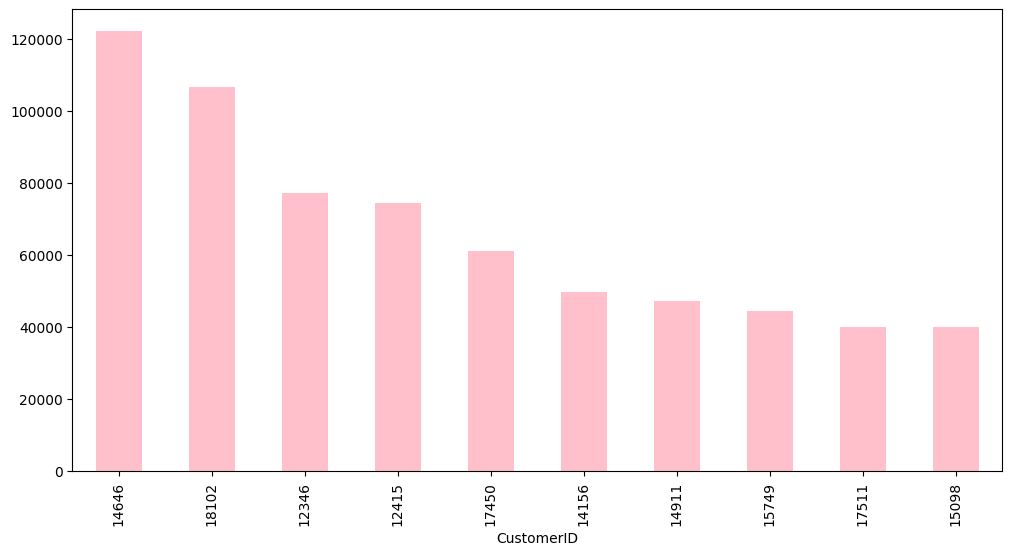

In [ ]:
top_10.plot(kind='bar',figsize=(12,6),color='pink')

### ***Find out the top 10 customers who have ordered bulk quantity***

In [ ]:
bulk=data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
bulk

,Quantity
CustomerID,
14646,86411.0
12346,74215.0
12415,47320.0
13694,37470.0
14298,36064.0
17511,27843.0
18102,24021.0
14156,23911.0
15311,23283.0


<Axes: xlabel='CustomerID'>

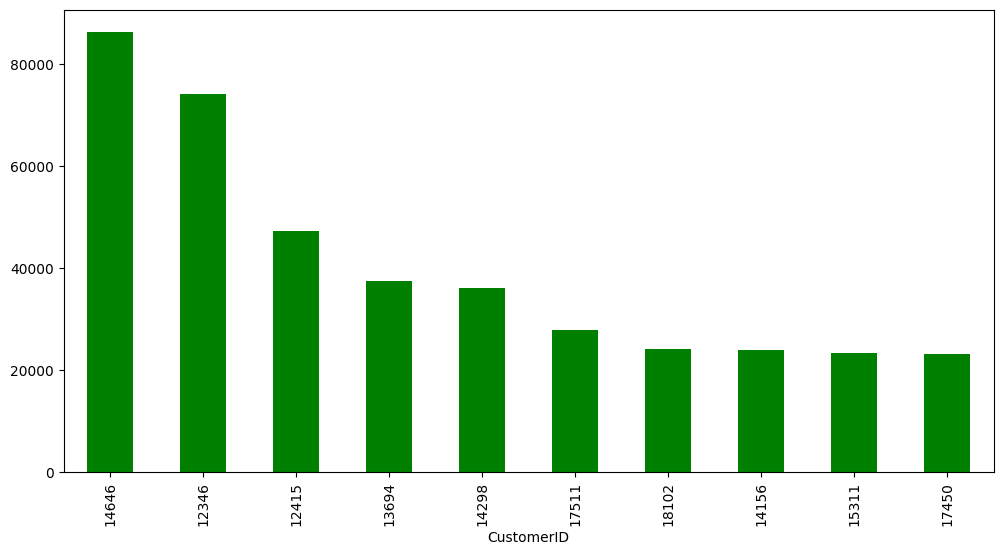

In [ ]:
#create bar chart of top 10 bulk order
bulk.plot(kind='bar',color='green',figsize=(12,6))

# **Most purchased products**


In [ ]:
most_p=data.groupby(['CustomerID','Description'])['Quantity'].sum().sort_values(ascending=False)
most_p.head(10)

,,Quantity
CustomerID,Description,
12346,MEDIUM CERAMIC TOP STORAGE JAR,74215.0
16333,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10080.0
16422,BROCADE RING PURSE,7200.0
15749,FAIRY CAKE FLANNEL ASSORTED COLOUR,6228.0
16029,GROW A FLYTRAP OR SUNFLOWER IN TIN,4800.0
17306,PACK OF 12 LONDON TISSUES,4464.0
13135,SMALL POPCORN HOLDER,4300.0
18102,CREAM HEART CARD HOLDER,4212.0
15749,GIN + TONIC DIET METAL SIGN,4000.0


In [ ]:
most_p.reset_index()

,CustomerID,Description,Quantity
0,12346,MEDIUM CERAMIC TOP STORAGE JAR,74215.0
1,16333,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10080.0
2,16422,BROCADE RING PURSE,7200.0
3,15749,FAIRY CAKE FLANNEL ASSORTED COLOUR,6228.0
4,16029,GROW A FLYTRAP OR SUNFLOWER IN TIN,4800.0
...,...,...,...
127933,14796,SET 20 NAPKINS FAIRY CAKES DESIGN,1.0
127934,17337,DECORATIVE FLORE BATHROOM BOTTLE,1.0
127935,14796,SET 3 SONG BIRD PAPER EGGS ASSORTED,1.0
127936,13230,RETROSPOT LARGE MILK JUG,1.0


# **Most Popular Products**

In [ ]:
most_popular=data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [ ]:
most_popular.head(10)

,Quantity
Description,
MEDIUM CERAMIC TOP STORAGE JAR,75389.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS,30628.0
WHITE HANGING HEART T-LIGHT HOLDER,21686.0
JUMBO BAG RED RETROSPOT,20886.0
PACK OF 72 RETROSPOT CAKE CASES,20258.0
SMALL POPCORN HOLDER,17957.0
ASSORTED COLOURS SILK FAN,14868.0
PACK OF 12 LONDON TISSUES,14757.0
ASSORTED COLOUR BIRD ORNAMENT,14683.0


In [ ]:
data.loc[data.Description=='ASSORTED COLOURS SILK FAN','Quantity'].sum()

14868.0

### ***Retreive the year and month from invoice date***

In [ ]:
data['Year']=data['InvoiceDate'].dt.year
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010


In [ ]:
data['Year'].value_counts()

,count
Year,
2011,139948
2010,25673


In [ ]:
data['Month']=data['InvoiceDate'].dt.month_name()
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Month'],
      dtype='object')

# **Calculate Sales per year**

In [ ]:
sales_year=data.groupby(['Year','Month'])['TotalSales'].sum().reset_index()
sales_year

,Year,Month,TotalSales
0,2010,December,570422.730
1,2011,April,468374.331
2,2011,February,446084.920
3,2011,January,568101.310
4,2011,June,534499.630
5,2011,March,594081.760
6,2011,May,677355.150


In [ ]:
sales_2010=data[data['Year']==2010].groupby(['Month'])['TotalSales'].sum().reset_index()
sales_2010

,Month,TotalSales
0,December,570422.73


In [ ]:
sales_2011=data[data['Year']==2011].groupby(['Month'])['TotalSales'].sum().reset_index()
sales_2011

,Month,TotalSales
0,April,468374.331
1,February,446084.920
2,January,568101.310
3,June,534499.630
4,March,594081.760
5,May,677355.150


# **Visualize sales per year**

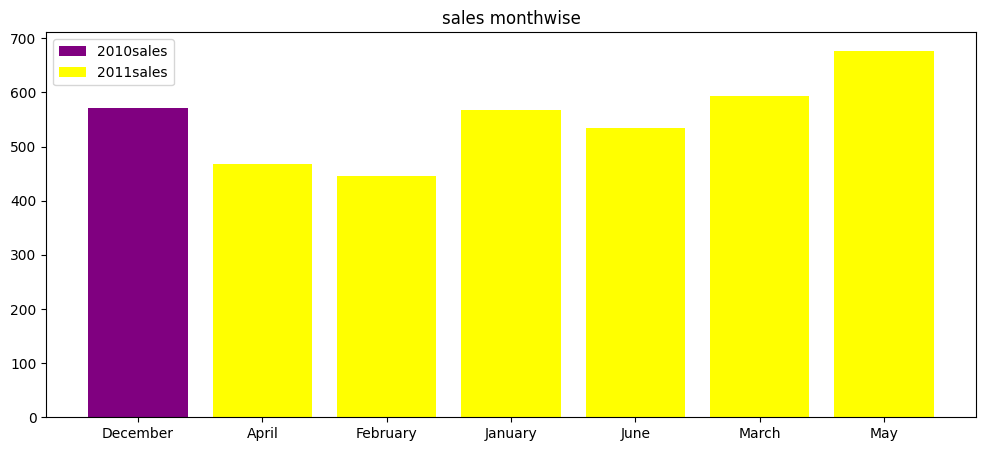

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(sales_2010['Month'],sales_2010['TotalSales']/1000,label='2010sales',color='purple')
plt.bar(sales_2011['Month'],sales_2011['TotalSales']/1000,label='2011sales',color='yellow')
plt.legend()
plt.title('sales monthwise')
plt.show()

### ***This Python-based e-commerce analysis successfully identified critical patterns in customer behaviour, sales performance, and product trends. The insights derived from this study can assist businesses in making data-driven decisions to optimize revenue, improve customer satisfaction, and enhance operational efficiency. Future work can focus on advanced predictive modelling and recommendation systems to further personalize customer experience.***

# **THANK YOU :)**